<a href="https://colab.research.google.com/github/IsaAfonsoCollares/Pos-Graduacao-em-Ciencias-de-Dados-Mackenzie/blob/main/T4-analise_python/T4_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Objetivo
Faça uma Análise Exploratória dos Dados (EDA) com dados de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados.  

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta.  

# Base de dados

Para esta análise serão utilizadas as bases de dados:  
  
Gender ratio of mean years in school (women % men, 25 to 34 years) dados dísponiveis em Gapminder, inclui educação primária, secundária e terciária.   
  
OECD (2022), Gender wage gap (indicator). doi: 10.1787/7cee77aa-en (Accessed on 04 December 2022).



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

proporcao_estudo = pd.read_csv("mean_years_in_school.csv")
wage_gap = pd.read_csv("Gender_wage_gap.csv")

wage_gap


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.582734,NaN
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.754717,NaN
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.390805,NaN
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.791667,NaN
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.000000,NaN
...,...,...,...,...,...,...,...,...
1239,BRA,WAGEGAP,EMPLOYEE,PC,A,2017,13.333333,NaN
1240,BRA,WAGEGAP,EMPLOYEE,PC,A,2018,10.666667,NaN
1241,BRA,WAGEGAP,EMPLOYEE,PC,A,2019,6.666667,NaN
1242,BRA,WAGEGAP,EMPLOYEE,PC,A,2020,6.250000,NaN


#Perguntas

1) Qual a média mundial da proporção de anos de estudo entre mulheres e homens? 

In [ ]:
proporcao_estudo.columns

Index(['country', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014'],
      dtype='object')

In [ ]:
ultimo_ano = proporcao_estudo.columns[-1] #encontrar o último ano com dados
#cria uma nova dataframe apenas com os dados do último ano disponível organizando os valores em ordem decrescente
df_ultimo_ano = (proporcao_estudo[['country',ultimo_ano]]).sort_values(by='2014', ascending = False) 
avg = round(df_ultimo_ano['2014'].mean(),2)#calcula a média dos valores de 2014 arredondando par 2 casas decimais
if avg >= 100:
  print (f"A média mundial da proporção de anos de estudo em {ultimo_ano} era {avg}. O que significa que em média no mundo mulheres estudam {round(avg-100, 2)}% a mais anos que homens.")
else:
  print (f"A média mundial da proporção de anos de estudo em {ultimo_ano} era {avg}. O que significa que em média no mundo mulheres estudam {round(100-avg,2)}% a menos anos que homens.")

A média mundial da proporção de anos de estudo em 2014 era 91.96. O que significa que em média no mundo mulheres estudam 8.04% a menos anos que homens.


2) Quais são os 10 países com maior proporção de anos de estudo entre mulheres e homens ?

Text(0, 0.5, 'Proporção de anos de estudo mulheres/homens (%)')

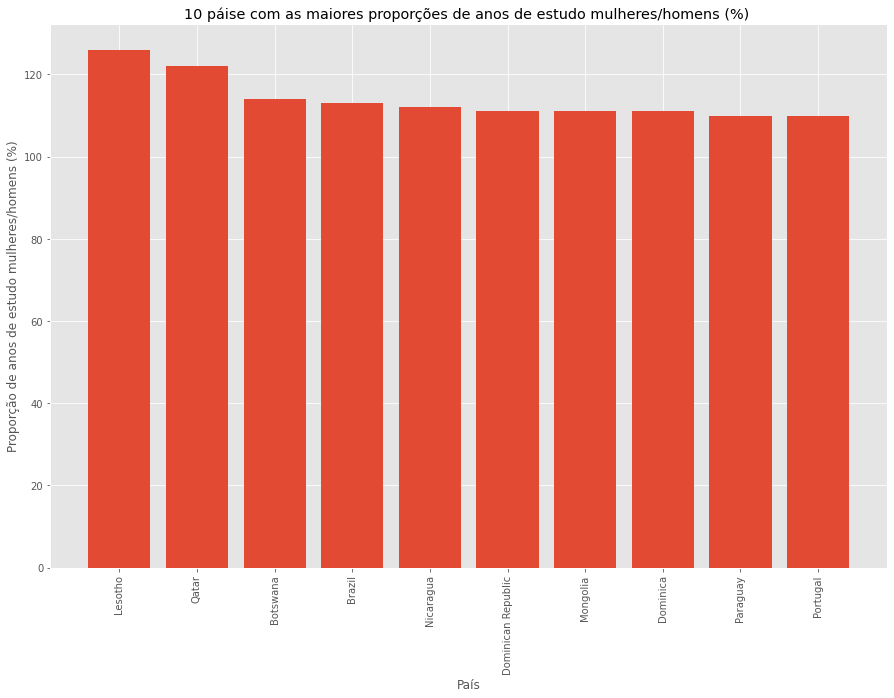

In [ ]:
df_10primeiros = df_ultimo_ano.head(10)
#gráfico para os 10 páises com proporções mais altas
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.bar(df_10primeiros['country'], df_10primeiros['2014'])
plt.xticks(rotation=90)
plt.title("10 páise com as maiores proporções de anos de estudo mulheres/homens (%) ")
plt.xlabel('País')
plt.ylabel('Proporção de anos de estudo mulheres/homens (%)')


3) Quais os 10 países com a menor proporção de anos de estudo entre mulheres e homens?

Text(0, 0.5, 'Proporção de anos de estudo mulheres/homens (%)')

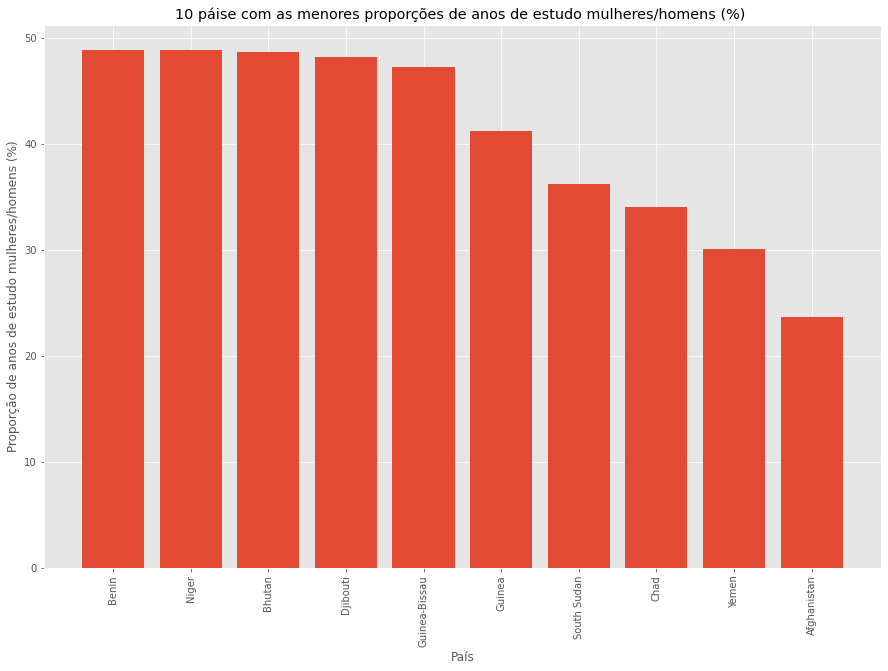

In [ ]:
df_10ultimos = df_ultimo_ano.tail(10)
#gráfico para os 10 paíse com proporções mais baixas
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.bar(df_10ultimos['country'], df_10ultimos['2014'])
plt.xticks(rotation=90)
plt.title("10 páise com as menores proporções de anos de estudo mulheres/homens (%) ")
plt.xlabel('País')
plt.ylabel('Proporção de anos de estudo mulheres/homens (%)')


4) Gráfico comparativos dos 10 paíse com proporções altas e 10 com proporções baixas

Text(0, 0.5, 'Proporção de anos de estudo mulheres/homens (%)')

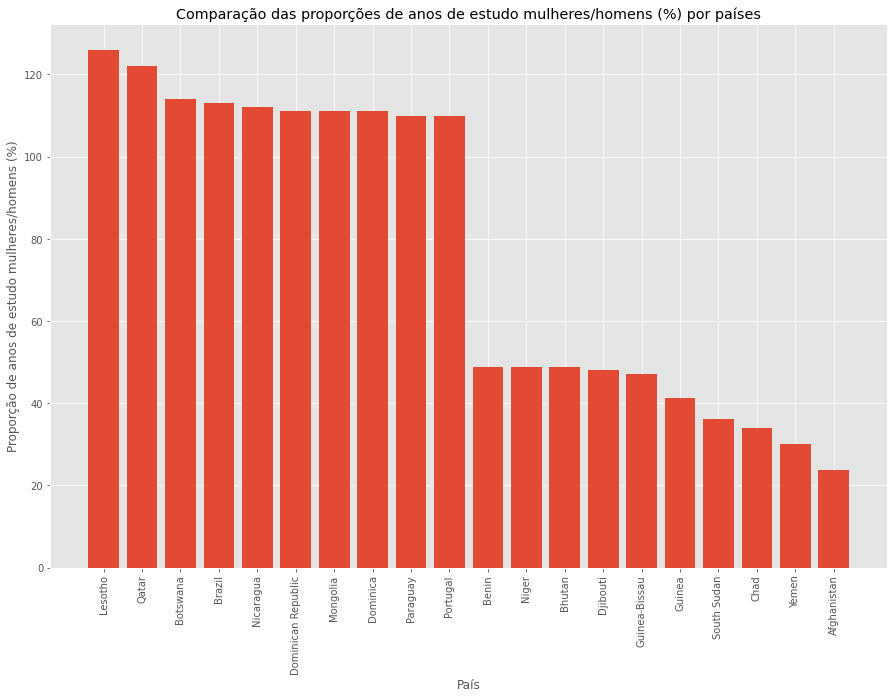

In [ ]:
df_merge = pd.merge(df_10primeiros, df_10ultimos, how='outer')
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.bar(df_merge['country'], df_merge['2014'])
plt.xticks(rotation=90)
plt.title("Comparação das proporções de anos de estudo mulheres/homens (%) por países")
plt.xlabel('País')
plt.ylabel('Proporção de anos de estudo mulheres/homens (%)')


5) Qual a média mundial de diferença salarial entre homens e mulheres?

In [ ]:
wage_gap

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.582734,NaN
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.754717,NaN
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.390805,NaN
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.791667,NaN
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.000000,NaN
...,...,...,...,...,...,...,...,...
1239,BRA,WAGEGAP,EMPLOYEE,PC,A,2017,13.333333,NaN
1240,BRA,WAGEGAP,EMPLOYEE,PC,A,2018,10.666667,NaN
1241,BRA,WAGEGAP,EMPLOYEE,PC,A,2019,6.666667,NaN
1242,BRA,WAGEGAP,EMPLOYEE,PC,A,2020,6.250000,NaN


In [ ]:
wage_gap_drop = wage_gap.drop(columns=['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'])
wage_gap_comp = wage_gap_drop[wage_gap_drop.TIME.eq(2014)]
wage_gap_comp = wage_gap_comp[wage_gap_comp.SUBJECT.eq('EMPLOYEE')]
avg_gap = round(wage_gap_comp['Value'].mean(),2)
print(f"A média de diferença salarial no mundo em 2014 era de {avg_gap}%, o que significa que neste ano em média mulheres ganhavam {avg_gap}% a menos que homens")

A média de diferença salarial no mundo em 2014 era de 12.94%, o que significa que neste ano em média mulheres ganhavam 12.94% a menos que homens


6) No Brasil, qual a proporção de anos de estudos emtre mulheres e homens e qual a diferença salarial ?

In [ ]:
for i in range(len(wage_gap_comp['LOCATION'])):
  if wage_gap_comp.LOCATION.iloc[i] == "BRA":
    gap_BRA = round(wage_gap_comp.iloc[i]['Value'],2)
    print(gap_BRA)

for i in range(len(df_ultimo_ano['country'])):
  if df_ultimo_ano.country.iloc[i] == 'Brazil':
    anos_estudo = round(df_ultimo_ano.iloc[i]['2014'], 2)

if gap_BRA > 0  and anos_estudo > 100:
  print(f"No Brasil em {ultimo_ano} as mulheres tinham em média {anos_estudo - 100}% anos de estudo a mais que homens e ganhavam {gap_BRA}% a menos que os homens")

elif  gap_BRA < 0  and anos_estudo > 100:
  print(f"No Brasil em {ultimo_ano} as mulheres tinham em média {anos_estudo - 100}% anos de estudo a mais que homens e ganhavam {gap_BRA}% a mais que os homens") 

elif  gap_BRA > 0  and anos_estudo < 100:
  print(f"No Brasil em {ultimo_ano} as mulheres tinham em média {anos_estudo - 100}% anos de estudo a menos que homens e ganhavam {gap_BRA}% a menos que os homens")  

else:
  print(f"No Brasil em {ultimo_ano} as mulheres tinham em média {anos_estudo - 100}% anos de estudo a menos que homens e ganhavam {gap_BRA}% a mais que os homens") 


16.67
No Brasil em 2014 as mulheres tinham em média 13.0% anos de estudo a mais que homens e ganhavam 16.67% a menos que os homens


# Conclusão

Com estas análise é possível perceber que em 2014 (último ano em que os dados estavam disponíveis) mulheres estudavam em média 8.04% anos a menos do que homens, é importante resaltar que a média neste caso foi feita considerando apenas a quantidade de países e não a quantidade de mulheres em cada país o que pode ter induzido a média a um valor inferior a real média mundial.  
    
Na diferença salarial temos uma média mundial de 12,94%, indicando que em 2014 mulheres recebiam em média 12,94% a menos que homens.  
  
Olhando especificamente para o Brasil, em 2014 mesmo estudando 13% anos a mais do que homens, mulheres recebiam quase 17% a menos que os homens, ou seja, mesmo com mais anos de estudo mulheres ainda recebiam bem menos que homens.